In [6]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=9a5ed62dfac9d81cb03b5943635d170d602fbb09e0fdef67f0685ea80b948f03
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [7]:
import wget

wget.download("https://nlp.stanford.edu/software/stanford-corenlp-4.2.2.zip")
wget.download("https://nlp.stanford.edu/software/stanford-corenlp-4.2.2-models-english.jar")

NameError: ignored

In [14]:
import zipfile
zipfile.ZipFile("/content/stanford-corenlp-4.2.2.zip").extractall()

In [23]:
from nltk.parse.stanford import StanfordDependencyParser

# Path to CoreNLP jar unzipped
jar_path = '/content/stanford-corenlp-4.2.2/stanford-corenlp-4.2.2.jar'

# Path to CoreNLP model jar
models_jar_path = '/content/stanford-corenlp-4.2.2-models-english.jar'

sentence = 'In my opinion, the food was really really good , but their ambiance was horrible, and my mom thinks the waiter was amazing'

# Initialize StanfordDependency Parser from the path
parser = StanfordDependencyParser(path_to_jar = jar_path, path_to_models_jar = models_jar_path)

# Parse the sentence
result = parser.raw_parse(sentence)
dependency = result.__next__()


print ("{:<15} | {:<10} | {:<10} | {:<15} | {:<10}".format('Head', 'Head POS','Relation','Dependent', 'Dependent POS'))
print ("-" * 75)
  
# Use dependency.triples() to extract the dependency triples in the form
# ((head word, head POS), relation, (dependent word, dependent POS))  
for dep in list(dependency.triples()):
  print ("{:<15} | {:<10} | {:<10} | {:<15} | {:<10}"
         .format(str(dep[0][0]),str(dep[0][1]), str(dep[1]), str(dep[2][0]),str(dep[2][1])))

Head            | Head POS   | Relation   | Dependent       | Dependent POS
---------------------------------------------------------------------------
horrible        | JJ         | obl        | opinion         | NN        
opinion         | NN         | case       | In              | IN        
opinion         | NN         | nmod:poss  | my              | PRP$      
horrible        | JJ         | dep        | good            | JJ        
good            | JJ         | nsubj      | food            | NN        
food            | NN         | det        | the             | DT        
good            | JJ         | cop        | was             | VBD       
good            | JJ         | advmod     | really          | RB        
good            | JJ         | advmod     | really          | RB        
horrible        | JJ         | cc         | but             | CC        
horrible        | JJ         | nsubj      | ambiance        | NN        
ambiance        | NN         | nmod:poss  | t

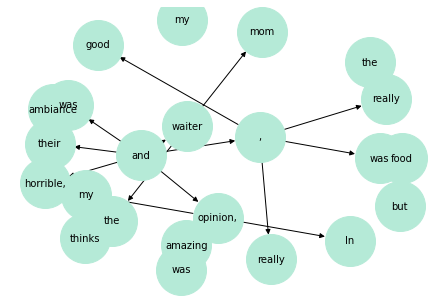

In [18]:
# importing networkx
import networkx as nx
import matplotlib.pyplot as plt
# Using reverse() to reverse the direction of edges as nx_graph() returns inverted edges
G = dependency.nx_graph().reverse()
# nx_graph() returns numeric node labels starting from 1
# Create a dictionary to map numeric nodes and words in the sentence
words = sentence.split(" ")
labels = {index + 1: words[index] for index in range(len(words))}
nx.draw(G, with_labels=True, labels=labels, node_size=2500, node_color='#B5EAD7', font_size=10)

In [25]:
!pip install graphviz
from graphviz import Source
dot_def = dependency.to_dot()
'''
The below lines require graphviz executables to be installed to your system. If that does not work, print the dot_def object and paste the output on http://graphs.grevian.org/graph/
'''
source = Source(dot_def, filename="dependency_graph", format="png")
source.view()

'dependency_graph.png'

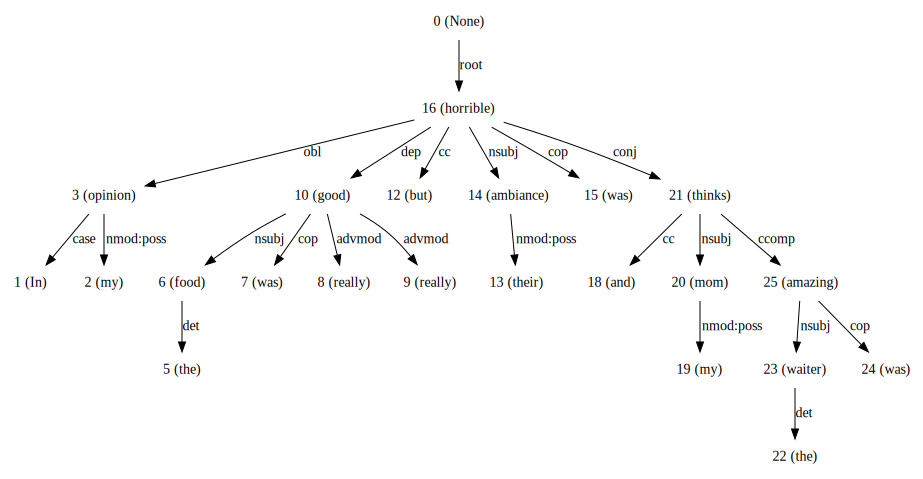

In [24]:
dependency